In [36]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

(512, 512)


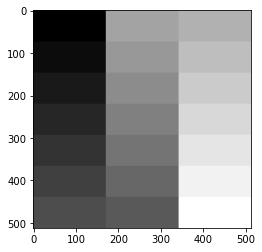

In [38]:
img = cv2.imread('gray21.512.tiff',0)
# img=cv2.resize(img,(512,512))
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')
print(img.shape)

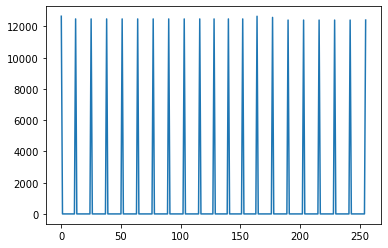

In [40]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [42]:
freq_arr=np.zeros(256,'uint64')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        freq_arr[img[i][j]]=freq_arr[img[i][j]]+1

sum1=img.shape[0]*img.shape[1]
print(freq_arr)

[12654     0     0     0     0     0     0     0     0     0     0     0
 12483     0     0     0     0     0     0     0     0     0     0     0
     0 12483     0     0     0     0     0     0     0     0     0     0
     0     0 12483     0     0     0     0     0     0     0     0     0
     0     0     0 12483     0     0     0     0     0     0     0     0
     0     0     0     0 12483     0     0     0     0     0     0     0
     0     0     0     0     0 12483     0     0     0     0     0     0
     0     0     0     0     0     0 12483     0     0     0     0     0
     0     0     0     0     0     0     0 12483     0     0     0     0
     0     0     0     0     0     0     0     0 12483     0     0     0
     0     0     0     0     0     0     0     0 12483     0     0     0
     0     0     0     0     0     0     0     0 12483     0     0     0
     0     0     0     0     0     0     0     0 12483     0     0     0
     0     0     0     0     0     0     0     0 12

In [44]:
def backgroung(threshold):
    tot=tot1=tot3=Vb=Wb=Mb=0
    for i in range(threshold):
        tot=tot+freq_arr[i]
    Wb=tot/sum1
    if Wb==0:
        return 0,0,0
    for i in range(threshold):
        tot1=tot1+ i*freq_arr[i]
    Mb=tot1/tot
    for i in range(threshold):
        tot3=tot3+ (i-Mb)*(i-Mb)*freq_arr[i]
    Vb=tot3/tot
    return Wb,Mb,Vb


In [46]:
def foregroung(threshold):
    tot=tot1=tot3=Vf=Wf=Mf=0
    for i in range(threshold,256):
        tot=tot+freq_arr[i]
    Wf=tot/sum1
    if Wf==0:
        return 0,0,0
    for i in range(threshold,256):
        tot1=tot1+ i*freq_arr[i]
    Mf=tot1/tot
    for i in range(threshold,256):
        tot3=tot3+ (i-Mf)*(i-Mf)*freq_arr[i]
    Vf=tot3/tot
    return Wf,Mf,Vf


In [53]:
Within_Class_Variance=np.zeros(256,'float64')
Between_Class_Variance=np.zeros(256,'float64')
for i in range (256):
    values_f=[]
    values_b=[]
    wf,mf,vf=foregroung(i)
    wb,mb,vb=backgroung(i)
    Within_Class_Variance[i]=wf*vf + wb*vb
    Between_Class_Variance[i]=wf*wb * (mf-mb)*(mf-mb)
    values_f.clear()

print(Between_Class_Variance)

[   0.          818.54806758  818.54806758  818.54806758  818.54806758
  818.54806758  818.54806758  818.54806758  818.54806758  818.54806758
  818.54806758  818.54806758  818.54806758 1554.85866573 1554.85866573
 1554.85866573 1554.85866573 1554.85866573 1554.85866573 1554.85866573
 1554.85866573 1554.85866573 1554.85866573 1554.85866573 1554.85866573
 1554.85866573 2206.70889    2206.70889    2206.70889    2206.70889
 2206.70889    2206.70889    2206.70889    2206.70889    2206.70889
 2206.70889    2206.70889    2206.70889    2206.70889    2774.08830436
 2774.08830436 2774.08830436 2774.08830436 2774.08830436 2774.08830436
 2774.08830436 2774.08830436 2774.08830436 2774.08830436 2774.08830436
 2774.08830436 2774.08830436 3256.99864111 3256.99864111 3256.99864111
 3256.99864111 3256.99864111 3256.99864111 3256.99864111 3256.99864111
 3256.99864111 3256.99864111 3256.99864111 3256.99864111 3256.99864111
 3655.44475248 3655.44475248 3655.44475248 3655.44475248 3655.44475248
 3655.444752

In [50]:
print(np.argmin(Within_Class_Variance))
threshold_value=np.argmin(Within_Class_Variance)
print(np.argmax(Between_Class_Variance))
threshold_value_1=np.argmax(Between_Class_Variance)

117
117


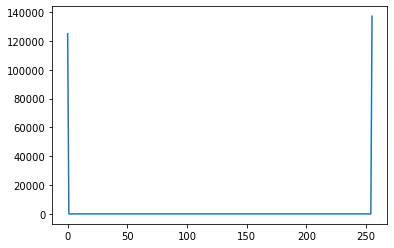

In [51]:
new_img=np.zeros(img.shape,'uint16')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j]<threshold_value:
            new_img[i][j]=0
        else:
            new_img[i][j]=255

hist = cv2.calcHist([new_img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

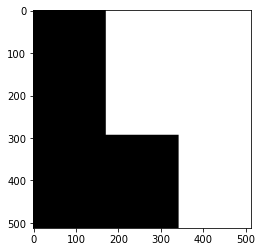

In [52]:
plt.imshow(new_img,'gray')